<a href="https://colab.research.google.com/github/chcmagalhaes/DS_Projetos/blob/master/Detec%C3%A7%C3%A3o_de_Fraudes_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
*by [Carlos Henrique](https://github.com/chcmagalhaes)*  

---



## Detecção de Fraudes em Cartões de Créditos. 
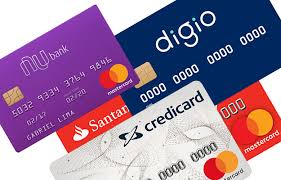

Hoje em dia é impossivel sair de casa sem um cartão de crédito. Cada vez mesnos as pessoas utilizam dinheiro "fisico" para adquirir bens os serviços. 
Com o volume de transações chegam a casa dos bilhões, as fraudes ocorrem na mesma proporção. 

Nossa função aqui, será analisar as transações de um *dataset*, disponibilizado no kaggle. 

Hoje, com o aumento das vendas por cartões pela internet, devido a pandemia. É tão necessário quanto detecetar as fraudes quanto não bloquear uma transação real. Nos dois universos, isso pode causar vários prejuizos para os bancos quanto para os clientes. 

Nossa missão, nesse projeto é, baseado nesse *dataset*, criar modelos de machine learning para aprimoração visando detectar e inibir estas fraudes. 



###Importando Dados. 


Como disse anteriormente, os dados estão no kaggle, contendo informações de dois dias de transações em uma adminstradora de cartões europeia. 

Neste *dataset*, foram classificadas 492 fraudes, em um universo de 290 mil transações. 



In [34]:
#importando pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler



In [2]:
#importando dados. 

dados = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"


df = pd.read_csv(dados)

### Analise Exploratória. 



** Plotar 5 Primeiras Entradas

In [3]:
#verificar as primeiras entradas

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Analisando as 5 primeiras entradas, podemos tirar as seguintes conclusões:
* a coluna Class é nossa variável ALVO. Onde:
** 0: Transação Normal
** 1: Transação Fraudulenta. 

* A coluna TIME e AMOUNT estão com seus valores originais. 

** Utilizar o método Discribe. 

In [5]:
#Ver Resultados Estatísticos do DS.

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Verificando o método *discribe*, notamos que a variavel AMOUNT, o valor médio das transações considerando todas as classes, é de 88.34, com mediana igual 22.00 e desvio padrão 250.12. 

Com isso podemos concluir que a maioria das transações são de valores baixo. No qual já esperávamos. 




###Verificar Valores Ausentes. 

In [7]:
#valores ausentes. 
df.isnull().sum().max()

0

Com o Retorno 0, fica confirmado que não há valores ausentes. Sendo assim, desnecessário uma etapa de limpeza. 


###Analise Grafica entre as clases. 

0    284315
1       492
Name: Class, dtype: int64

 Percentual de fraudes Representam 0.1727%



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

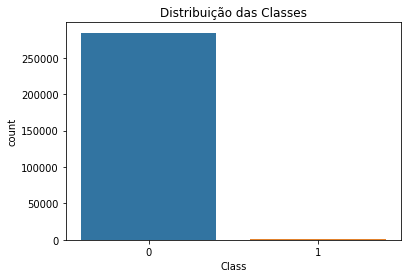

In [8]:
# Percentual do total sobre as fraudes. 
print (df.Class.value_counts())
print ("\n Percentual de fraudes Representam {:.4f}%\n".format((df[df.Class ==1].shape[0]/ df.shape[0])*100))


#Grafico
fig, ax =plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot()


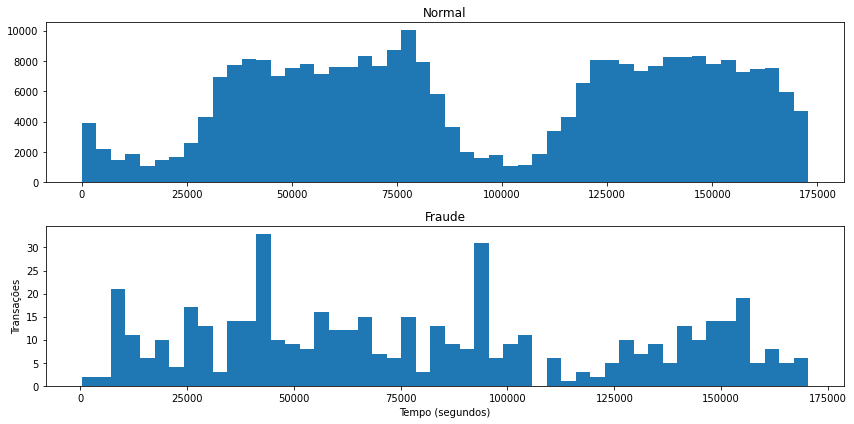

In [9]:
fig, ax = plt.subplots(nrows=2 , ncols=1, figsize=(12,6))

num_bins = 50


ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Normal')


ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraude')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

Com os graficos acima, podemos ter que uma noção entre a total de fraudes em relação ao total de transações, representando 0.17%. 

Abaixo, tentamos demonstrar a relação das classes ao longo da dimensão Tempo(TIME). Porém, não foi visto nenhuma relação a partir destas distribuições. 



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


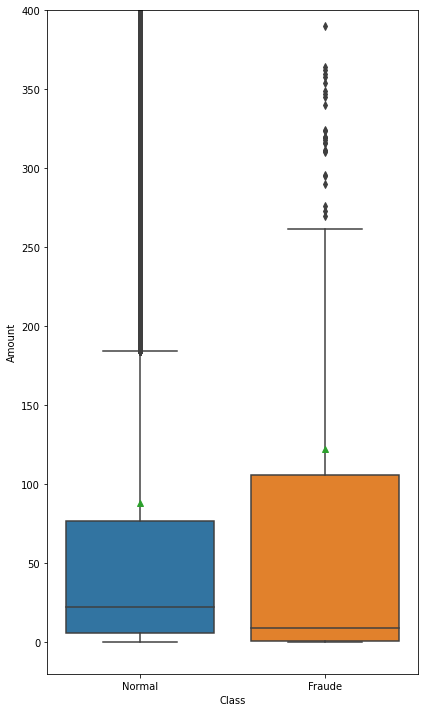

In [10]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans = True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0,1], ['Normal','Fraude'])
plt.tight_layout()

In [11]:
df[(df.Class == 1)& (df.Amount < 2000 ) ]['Amount'].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

Podemos ver no BoxPlot e no describe que a méida da Class é exatamente 118.13 e tem sua mediana igual a 9.21.




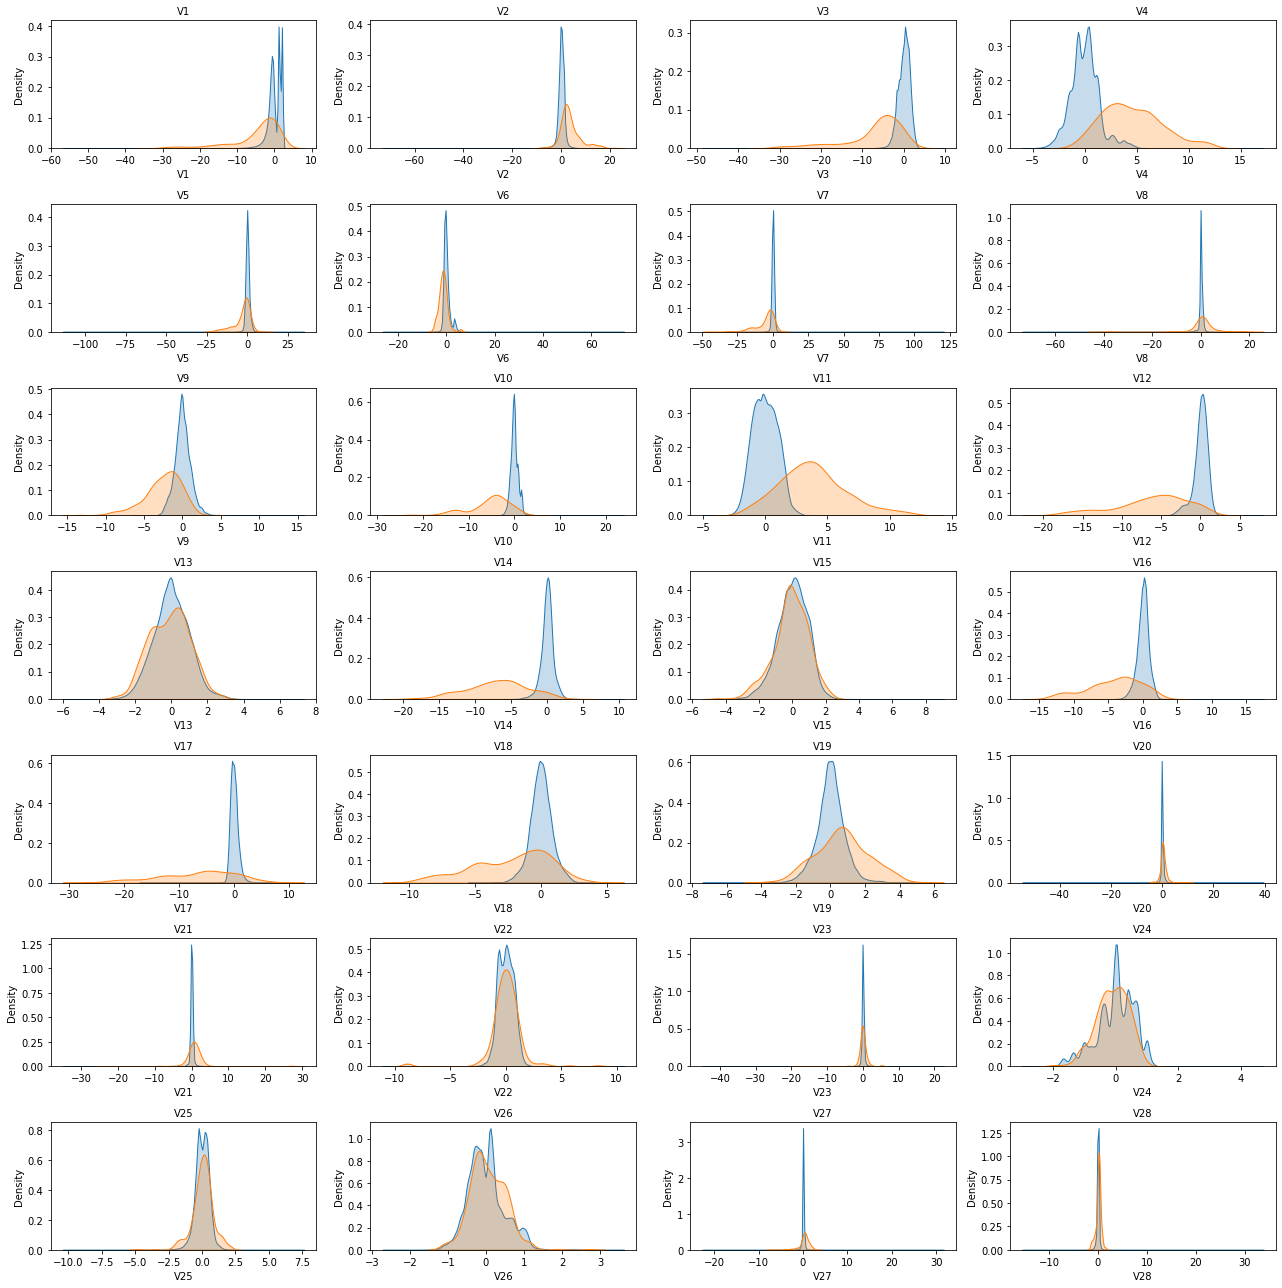

In [13]:
column_names = df.drop(['Class' , 'Amount', 'Time'], axis=1).columns
num_plots =len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]


fig, ax=plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1,wspace=1 )

idx=0
for col in column_names:
  idx +=1
  plt.subplot(7, 4, idx)
  sns.kdeplot(df_class_0[col], label="Class 0", shade= True)
  sns.kdeplot(df_class_1[col], label="Class 1", shade= True)
  plt.title(col, fontsize=10)
plt.tight_layout()

Acima vemos vários graficos de densidade, chamo a atençãopara as variáveis V3, V4, V10, V11 e V12. Note que são bem diferentes.Permitindo identificação de fraudes facilmente. 

Por outro lado, temos V8, V13, V15, que apresentam muita similaridade . 



## Preparando Dados 

Iremos construir um modelo de Regressão Logistica. Para isso precisamos:

* Padronizar as Features (TIME) e Amount.
* Definir Treino e Teste
* Balancear os dados utilizando imblearn.



### Padronizar Features. 


In [17]:
#padronizar colunas. 
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

#ver entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


### Dividir Treino e Treste. 

In [20]:
# Separar Variaveis X e y

X = df_clean.drop('Class', axis=1)
y = df['Class']

#dividir o DS entre treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

### Balanceamento de Dados



1    369
0    369
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


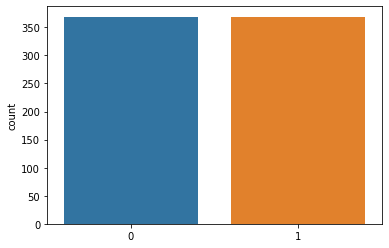

In [23]:
#Técnica under-sampling para balanceamento 

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_sample(X_train, y_train)

#ver Balanceamento 
print(pd.Series(y_rus).value_counts())

#Plotar Distribuição de Classes

sns.countplot(y_rus);

Nota-se que após o balanceamento não há mais a diferença do primeiro gráfico. 

Vamos realizar a agora a matriz de correlação. 

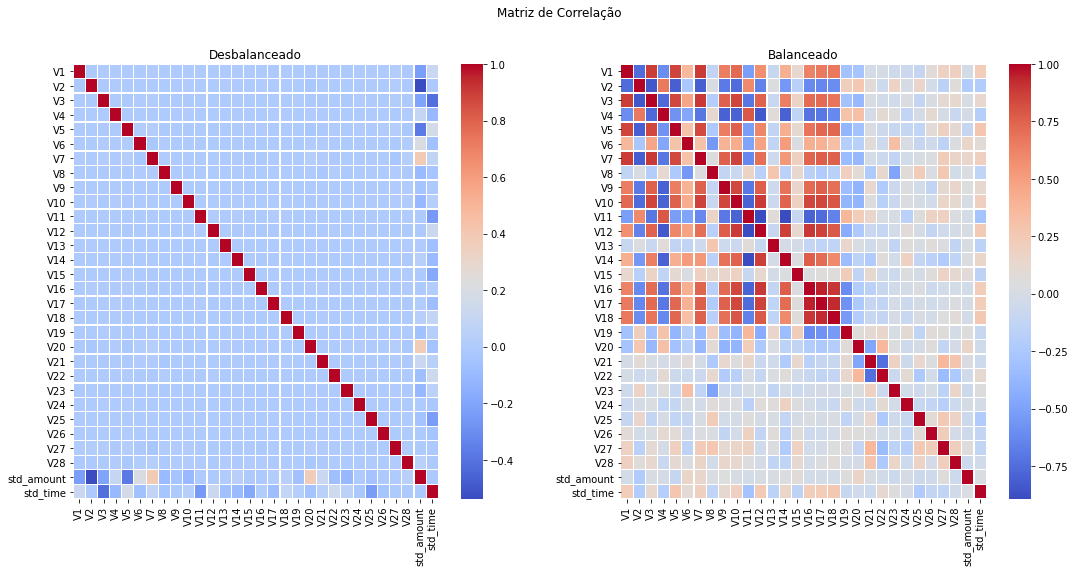

In [30]:
#plotar matriz de correlação. 

corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

###Modelo de Machine Learning

Após a preparação dos dados vamos construir um classificador usando a regressão logistica. 

Vamos instaciar e depois treina-lo. Logo após vamos realizar as previsões sobre os dados de teste. 

In [31]:
#instanciar e treinar o modelo 
np.random.seed(2)
model= LogisticRegression()
model.fit(X_rus, y_rus)


# previsões dos dados de teste. 

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Após o modelo treinado e suas previsões feita, vamos para o desempenho. 


1 - Mostrar Matriz de Confusão

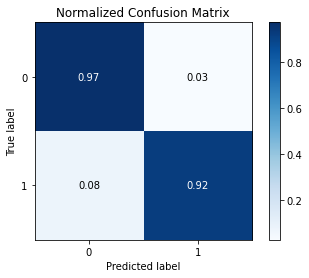

In [36]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize = True)

2 - Relatório de Classificação

In [37]:
print(classification_report(y_test, y_test, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     71079
           1     1.0000    1.0000    1.0000       123

    accuracy                         1.0000     71202
   macro avg     1.0000    1.0000    1.0000     71202
weighted avg     1.0000    1.0000    1.0000     71202



3- Acurácia do Modelo 

In [39]:
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test,y_pred)))

Acurácia: 0.9688



4 - Area sob Curva (AUC)

In [41]:
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

AUC: 0.9438

